- We need to install the MySQL Connector Python library

In [1]:
! pip install mysql-connector-python

  Using cached mysql_connector_python-8.0.28-cp38-cp38-win_amd64.whl (7.2 MB)


# Importing Libraries



In [2]:
import pandas as pd

import mysql.connector 

from mysql.connector import Error



We import the Error function separately so that we have easy access to it for our functions.

In [3]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: {err}")

    return connection
connection = create_server_connection("localhost", "root", 'Kinjay@1223')

Error: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [4]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: {err}")

    return connection
connection = create_server_connection("localhost", "root", 'Kinjay@123')

MySQL Database connection successful


- Let's go through this line by line so we understand what's happening here:

- The first line is we are naming the function (create_server_connection) and naming the arguments that that function will take (host_name, user_name and user_password).

- The next line closes any existing connections so that the server doesn't become confused with multiple open connections.

- Next we use a Python try-except block to handle any potential errors. The first part tries to create a connection to the server using the mysql.connector.connect() method using the details specified by the user in the arguments. If this works, the function prints a happy little success message.

- The except part of the block prints the error which MySQL Server returns, in the unfortunate circumstance that there is an error.

- Finally, if the connection is successful, the function returns a connection object.

# Creating a New Database


- Now that we have established a connection, our next step is to create a new database on our server.

In [23]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [25]:
create_database_query='create database sqlwithpython'
create_database(connection,create_database_query)

Error: '1007 (HY000): Can't create database 'sqlwithpython'; database exists'


## Our Database


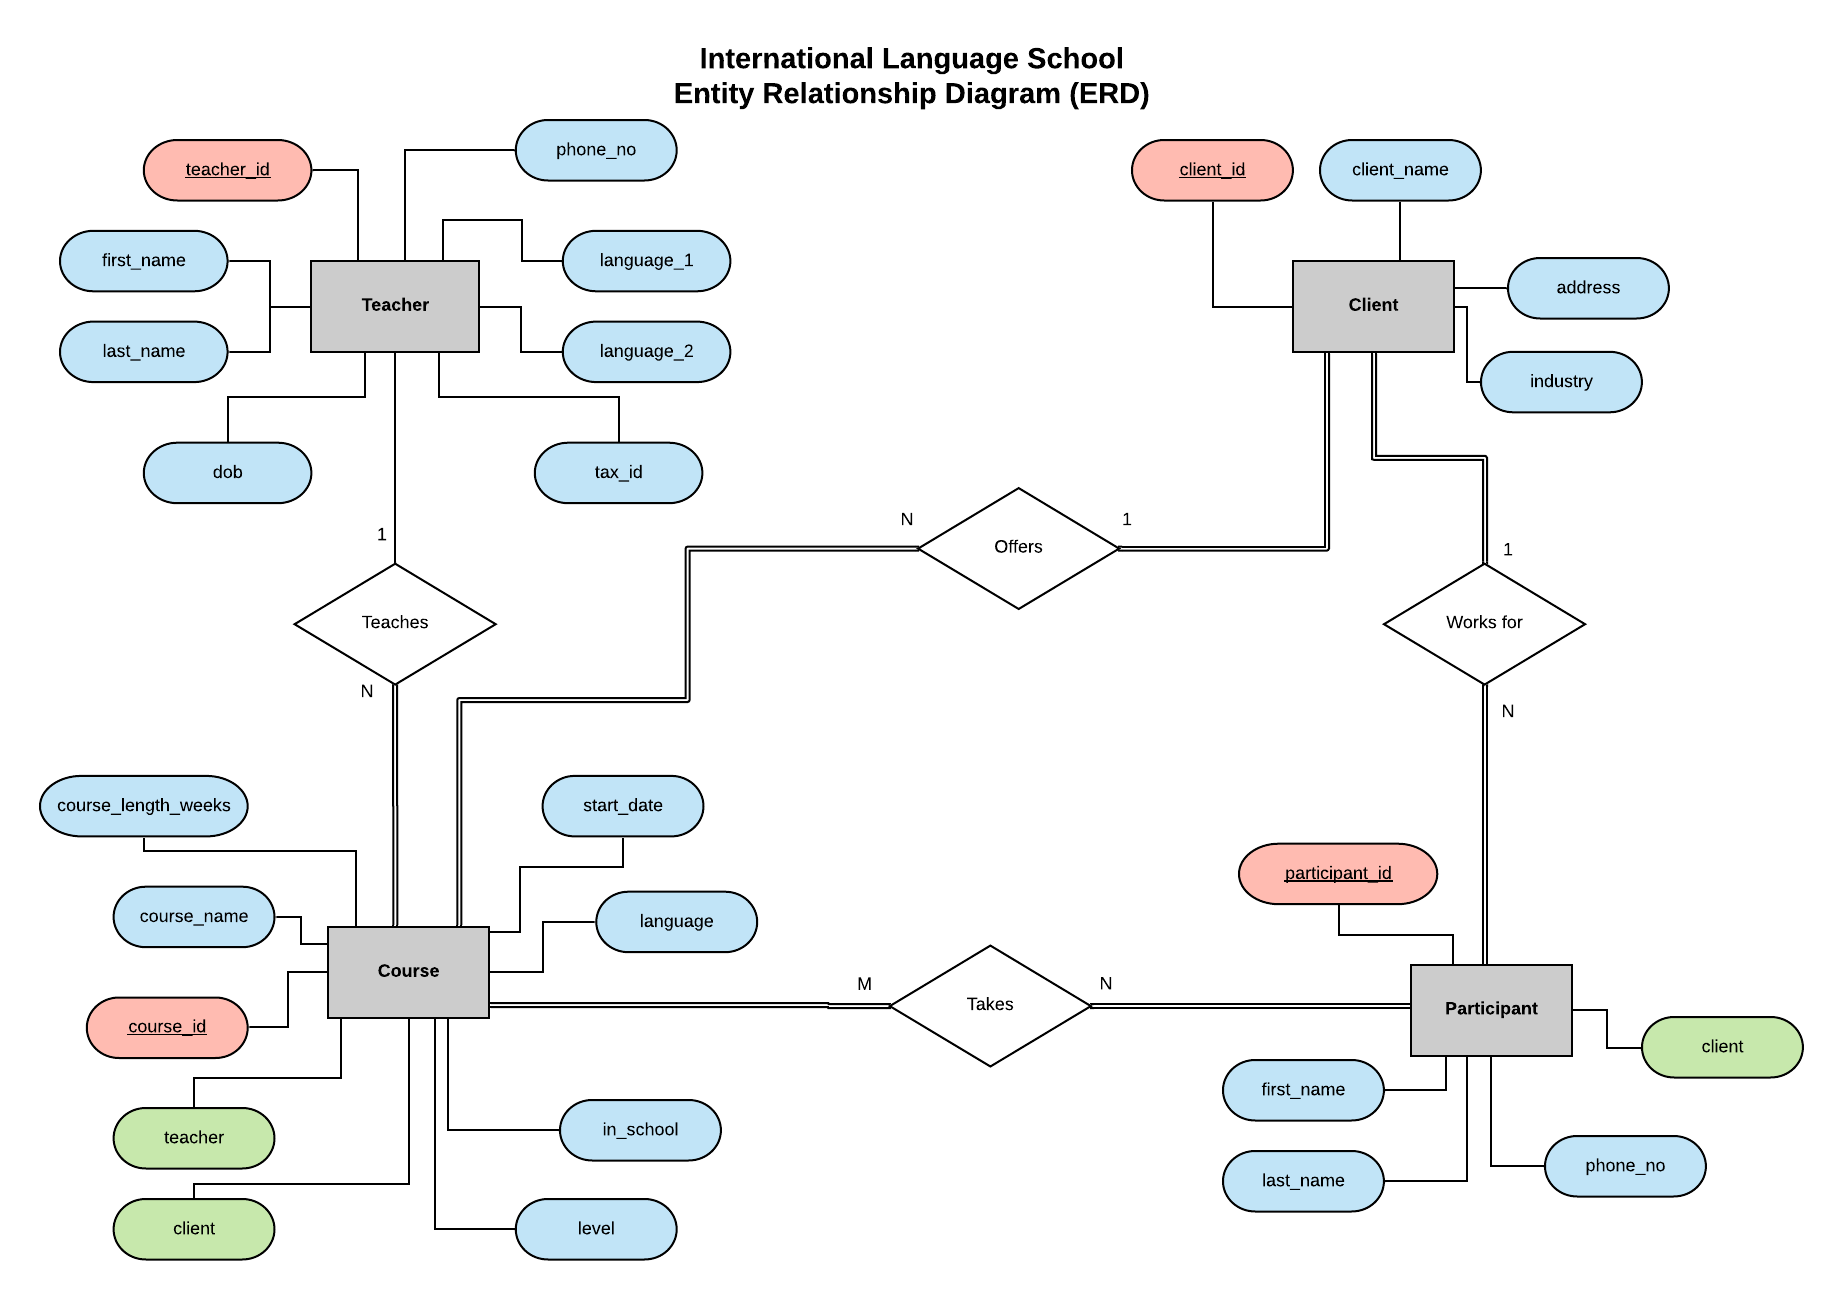

- Now you’ve created a database sqlwithpython on the database server. However, the connection object returned by the create_server_connection() is connected to the MySQL database server. You need to connect to the sqlwithpython database. To do so, you can modify create_server_connection() as follows:

- create_server_connection() now accepts an additional parameter called db_name. This parameter specifies the name of the database that you want to connect to. You can pass in the name of the database you want to connect to when you call this function:

In [17]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


In [18]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")


In [26]:
create_teacher_table = """
CREATE TABLE teacher (
  teacher_id INT PRIMARY KEY,
  first_name VARCHAR(40) NOT NULL,
  last_name VARCHAR(40) NOT NULL,
  language_1 VARCHAR(3) NOT NULL,
  language_2 VARCHAR(3),
  dob DATE,
  tax_id INT UNIQUE,
  phone_no VARCHAR(20)
  );
 """

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython') # Connect to the Database
execute_query(connection, create_teacher_table) # Execute our defined query

MySQL Database connection successful
Error: '1050 (42S01): Table 'teacher' already exists'


In [27]:
create_client_table = """
CREATE TABLE client (
  client_id INT PRIMARY KEY,
  client_name VARCHAR(40) NOT NULL,
  address VARCHAR(60) NOT NULL,
  industry VARCHAR(20)
);
 """

create_participant_table = """
CREATE TABLE participant (
  participant_id INT PRIMARY KEY,
  first_name VARCHAR(40) NOT NULL,
  last_name VARCHAR(40) NOT NULL,
  phone_no VARCHAR(20),
  client INT
);
"""

create_course_table = """
CREATE TABLE course (
  course_id INT PRIMARY KEY,
  course_name VARCHAR(40) NOT NULL,
  language VARCHAR(3) NOT NULL,
  level VARCHAR(2),
  course_length_weeks INT,
  start_date DATE,
  in_school BOOLEAN,
  teacher INT,
  client INT
);
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
execute_query(connection, create_client_table)
execute_query(connection, create_participant_table)
execute_query(connection, create_course_table)

MySQL Database connection successful
Query successful
Query successful
Query successful


- Now we want to define the relationships between them and create one more table to handle the many-to-many relationship between the participant and course tables

In [36]:
alter_course=""" ALTER TABLE COURSE ADD FOREIGN KEY(CLIENT) REFERENCES client(client_id) ON DELETE SET NULL;"""

alter_course_again = """ALTER TABLE course ADD FOREIGN KEY(teacher) REFERENCES teacher(teacher_id) ON DELETE SET NULL;"""

alter_participant = """ALTER TABLE participant ADD FOREIGN KEY(client) REFERENCES client(client_id) ON DELETE SET NULL;"""

create_takescourse_table = """CREATE TABLE takes_course (
  participant_id INT,
  course_id INT,
  PRIMARY KEY(participant_id, course_id),
  FOREIGN KEY(participant_id) REFERENCES participant(participant_id) ON DELETE CASCADE,
  FOREIGN KEY(course_id) REFERENCES course(course_id) ON DELETE CASCADE
);
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
execute_query(connection, alter_course)
execute_query(connection, alter_course_again)
execute_query(connection, alter_participant)
execute_query(connection, create_takescourse_table)

MySQL Database connection successful
Query successful
Query successful
Query successful
Error: '1050 (42S01): Table 'takes_course' already exists'


# Populating the Tables


In [37]:
pop_teacher = """
INSERT INTO teacher VALUES
(1,  'James', 'Smith', 'ENG', NULL, '1985-04-20', 12345, '+491774553676'),
(2, 'Stefanie',  'Martin',  'FRA', NULL,  '1970-02-17', 23456, '+491234567890'), 
(3, 'Steve', 'Wang',  'MAN', 'ENG', '1990-11-12', 34567, '+447840921333'),
(4, 'Friederike',  'Müller-Rossi', 'DEU', 'ITA', '1987-07-07',  45678, '+492345678901'),
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', '1963-05-30',  56789, '+491772635467'),
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', '1995-09-08',  67890, '+491231231232');
"""
pop_client = """
INSERT INTO client VALUES
(101, 'Big Business Federation', '123 Falschungstraße, 10999 Berlin', 'NGO'),
(102, 'eCommerce GmbH', '27 Ersatz Allee, 10317 Berlin', 'Retail'),
(103, 'AutoMaker AG',  '20 Künstlichstraße, 10023 Berlin', 'Auto'),
(104, 'Banko Bank',  '12 Betrugstraße, 12345 Berlin', 'Banking'),
(105, 'WeMoveIt GmbH', '138 Arglistweg, 10065 Berlin', 'Logistics');
"""

pop_participant = """
INSERT INTO participant VALUES
(101, 'Marina', 'Berg','491635558182', 101),
(102, 'Andrea', 'Duerr', '49159555740', 101),
(103, 'Philipp', 'Probst',  '49155555692', 102),
(104, 'René',  'Brandt',  '4916355546',  102),
(105, 'Susanne', 'Shuster', '49155555779', 102),
(106, 'Christian', 'Schreiner', '49162555375', 101),
(107, 'Harry', 'Kim', '49177555633', 101),
(108, 'Jan', 'Nowak', '49151555824', 101),
(109, 'Pablo', 'Garcia',  '49162555176', 101),
(110, 'Melanie', 'Dreschler', '49151555527', 103),
(111, 'Dieter', 'Durr',  '49178555311', 103),
(112, 'Max', 'Mustermann', '49152555195', 104),
(113, 'Maxine', 'Mustermann', '49177555355', 104),
(114, 'Heiko', 'Fleischer', '49155555581', 105);
"""

pop_course = """
INSERT INTO course VALUES
(12, 'English for Logistics', 'ENG', 'A1', 10, '2020-02-01', TRUE,  1, 105),
(13, 'Beginner English', 'ENG', 'A2', 40, '2019-11-12',  FALSE, 6, 101),
(14, 'Intermediate English', 'ENG', 'B2', 40, '2019-11-12', FALSE, 6, 101),
(15, 'Advanced English', 'ENG', 'C1', 40, '2019-11-12', FALSE, 6, 101),
(16, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, '2020-01-15', TRUE, 3, 103),
(17, 'Français intermédiaire', 'FRA', 'B1',  18, '2020-04-03', FALSE, 2, 101),
(18, 'Deutsch für Anfänger', 'DEU', 'A2', 8, '2020-02-14', TRUE, 4, 102),
(19, 'Intermediate English', 'ENG', 'B2', 10, '2020-03-29', FALSE, 1, 104),
(20, 'Fortgeschrittenes Russisch', 'RUS', 'C1',  4, '2020-04-08',  FALSE, 5, 103);
"""

pop_takescourse = """
INSERT INTO takes_course VALUES
(101, 15),
(101, 17),
(102, 17),
(103, 18),
(104, 18),
(105, 18),
(106, 13),
(107, 13),
(108, 13),
(109, 14),
(109, 15),
(110, 16),
(110, 20),
(111, 16),
(114, 12),
(112, 19),
(113, 19);
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
execute_query(connection, pop_teacher)
execute_query(connection, pop_client)
execute_query(connection, pop_participant)
execute_query(connection, pop_course)
execute_query(connection, pop_takescourse)

MySQL Database connection successful
Query successful
Query successful
Query successful
Query successful
Query successful


# Reading Data


- Now we have a functional database to work with. As a Data Analyst, you are likely to come into contact with existing databases in the organisations where you work. It will be very useful to know how to pull data out of those databases so it can then be fed into your python data pipeline. This is what we are going to work on next.

In [38]:
def read_query(connection,query):
    cursor=connection.cursor()
    try:
        cursor.execute(query)
        result=cursor.fetchall()
        return result
    except Error as e:
        print(f"error:{e}")

In [40]:
q1 = """
SELECT *
FROM teacher;
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
results = read_query(connection, q1)

for result in results:
    print(result)

MySQL Database connection successful
(1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')
(2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')
(3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')
(4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')


In [42]:
q5 = """
SELECT course.course_id, course.course_name, course.language, client.client_name, client.address
FROM course
JOIN client
ON course.client = client.client_id
WHERE course.in_school = FALSE;
"""


connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
results = read_query(connection, q5)

for result in results:
    print(result)

MySQL Database connection successful
(13, 'Beginner English', 'ENG', 'Big Business Federation', '123 Falschungstraße, 10999 Berlin')
(14, 'Intermediate English', 'ENG', 'Big Business Federation', '123 Falschungstraße, 10999 Berlin')
(15, 'Advanced English', 'ENG', 'Big Business Federation', '123 Falschungstraße, 10999 Berlin')
(17, 'Français intermédiaire', 'FRA', 'Big Business Federation', '123 Falschungstraße, 10999 Berlin')
(19, 'Intermediate English', 'ENG', 'Banko Bank', '12 Betrugstraße, 12345 Berlin')
(20, 'Fortgeschrittenes Russisch', 'RUS', 'AutoMaker AG', '20 Künstlichstraße, 10023 Berlin')


- For our data pipelines and workflows in Python, we might want to get these results in different formats to make them more useful or ready for us to manipulate.

- Let's go through a couple of examples to see how we can do that.

# Formatting Output into a List

In [44]:
db_list=[]
for result in results:
    result=result
    db_list.append(result)
db_list

[(13,
  'Beginner English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'),
 (14,
  'Intermediate English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'),
 (15,
  'Advanced English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'),
 (17,
  'Français intermédiaire',
  'FRA',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'),
 (19,
  'Intermediate English',
  'ENG',
  'Banko Bank',
  '12 Betrugstraße, 12345 Berlin'),
 (20,
  'Fortgeschrittenes Russisch',
  'RUS',
  'AutoMaker AG',
  '20 Künstlichstraße, 10023 Berlin')]

# Formatting Output into a List of Lists


In [45]:
db_list=[]
for result in results:
    result=list(result)
    db_list.append(result)
db_list

[[13,
  'Beginner English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'],
 [14,
  'Intermediate English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'],
 [15,
  'Advanced English',
  'ENG',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'],
 [17,
  'Français intermédiaire',
  'FRA',
  'Big Business Federation',
  '123 Falschungstraße, 10999 Berlin'],
 [19,
  'Intermediate English',
  'ENG',
  'Banko Bank',
  '12 Betrugstraße, 12345 Berlin'],
 [20,
  'Fortgeschrittenes Russisch',
  'RUS',
  'AutoMaker AG',
  '20 Künstlichstraße, 10023 Berlin']]

# Formatting Output into a pandas DataFrame


In [46]:
# Returns a list of lists and then creates a pandas DataFrame
from_db = []

for result in results:
    result = list(result)
    from_db.append(result)


columns = ["course_id", "course_name", "language", "client_name", "address"]
df = pd.DataFrame(from_db, columns=columns)
df

,course_id,course_name,language,client_name,address
0,13,Beginner English,ENG,Big Business Federation,"123 Falschungstraße, 10999 Berlin"
1,14,Intermediate English,ENG,Big Business Federation,"123 Falschungstraße, 10999 Berlin"
2,15,Advanced English,ENG,Big Business Federation,"123 Falschungstraße, 10999 Berlin"
3,17,Français intermédiaire,FRA,Big Business Federation,"123 Falschungstraße, 10999 Berlin"
4,19,Intermediate English,ENG,Banko Bank,"12 Betrugstraße, 12345 Berlin"
5,20,Fortgeschrittenes Russisch,RUS,AutoMaker AG,"20 Künstlichstraße, 10023 Berlin"


# Updating Records


In [47]:
update = """
UPDATE client 
SET address = '23 Fingiertweg, 14534 Berlin' 
WHERE client_id = 101;
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
results = read_query(connection, update)

MySQL Database connection successful


# Creating Records from Lists


Given that we're using Python to manipulate our SQL database, it would be useful to be able to take a Python data structure (such as a list) and insert that directly into our database.

This could be useful when we want to store logs of user activity on a social media app we have written in Python, or input from users into a Wiki we have built, for example. There are as many possible uses for this as you can think of.  

This method is also more secure if our database is open to our users at any point, as it helps to prevent against SQL Injection attacks, which can damage or even destroy our whole database.

To do this, we will write a function using the executemany() method, instead of the simpler execute() method we have been using thus far.

In [48]:
def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

Now we have the function, we need to define an SQL command ('sql') and a list containing the values we wish to enter into the database ('val'). The values must be stored as a list of tuples, which is a fairly common way to store data in Python.

In [49]:
sql = '''
    INSERT INTO teacher (teacher_id, first_name, last_name, language_1, language_2, dob, tax_id, phone_no) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    '''
    
val = [
    (7, 'Hank', 'Dodson', 'ENG', None, '1991-12-23', 11111, '+491772345678'), 
    (8, 'Sue', 'Perkins', 'MAN', 'ENG', '1976-02-02', 22222, '+491443456432')
]

Notice here that in the 'sql' code we use the '%s' as a placeholder for our value. The resemblance to the '%s' placeholder for a string in python is just coincidental (and frankly, very confusing), we want to use '%s' for all data types (strings, ints, dates, etc) with the MySQL Python Connector.

You can see a number of questions on Stackoverflow where someone has become confused and tried to use '%d' placeholders for integers because they're used to doing this in Python. This won't work here - we need to use a '%s' for each column we want to add a value to.

The executemany function then takes each tuple in our 'val' list and inserts the relevant value for that column in place of the placeholder and executes the SQL command for each tuple contained in the list.

This can be performed for multiple rows of data, so long as they are formatted correctly. In our example we will just add two new teachers, for illustrative purposes, but in principle we can add as many as we would like.

In [50]:
connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
execute_list_query(connection, sql, val)

MySQL Database connection successful
Query successful


In [54]:
q1 = """
SELECT *
FROM teacher;
"""

connection = create_db_connection("localhost", "root", 'Kinjay@123', 'sqlwithpython')
results = read_query(connection, q1)

for result in results:
    print(result)

MySQL Database connection successful
(1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')
(2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')
(3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')
(4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')
(7, 'Hank', 'Dodson', 'ENG', None, datetime.date(1991, 12, 23), 11111, '+491772345678')
(8, 'Sue', 'Perkins', 'MAN', 'ENG', datetime.date(1976, 2, 2), 22222, '+491443456432')
